All TPOT estimators can be created with the TPOTEstimator class. 
The TPOTClassifier and TPOTRegressor are set default parameters for the TPOTEstimator for Classification and Regression.

In [1]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.TPOTEstimator(  population_size=30,
                            generations=5,
                            scorers=['roc_auc_ovr'], #scorers can be a list of strings or a list of scorers. These get evaluated during cross validation. 
                            scorers_weights=[1],
                            classification=True,
                            n_jobs=1, 
                            early_stop=5, #how many generations with no improvement to stop after
                            
                            #List of other objective functions. All objective functions take in an untrained GraphPipeline and return a score or a list of scores
                            other_objective_functions= [ ],
                            
                            #List of weights for the other objective functions. Must be the same length as other_objective_functions. By default, bigger is better is set to True. 
                            other_objective_functions_weights=[],
                            verbose=2)

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

Generation: 100%|██████████| 5/5 [00:35<00:00,  7.17s/it]


0.9947089947089948


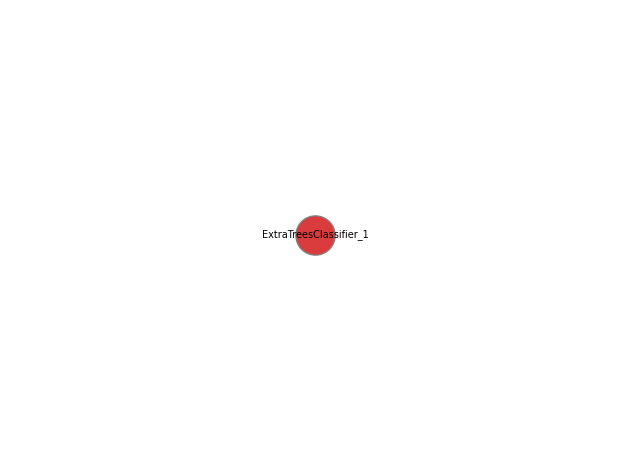

In [2]:
fitted_pipeline = est.fitted_pipeline_ # access best pipeline directly
fitted_pipeline.plot()

In [3]:
#view the summary of all evaluated individuals as a pandas dataframe
est.evaluated_individuals

,roc_auc_score,Parents,Variation_Function,Individual,Generation,Pareto_Front,Instance
0,0.99631,NaN,NaN,['LogisticRegression_1'],0.0,NaN,['LogisticRegression_1']
1,0.978247,NaN,NaN,['DecisionTreeClassifier_1'],0.0,NaN,['DecisionTreeClassifier_1']
2,0.966548,NaN,NaN,['KNeighborsClassifier_1'],0.0,NaN,['KNeighborsClassifier_1']
3,0.99877,NaN,NaN,['GradientBoostingClassifier_1'],0.0,NaN,['GradientBoostingClassifier_1']
4,1.0,NaN,NaN,['ExtraTreesClassifier_1'],0.0,0.0,['ExtraTreesClassifier_1']
...,...,...,...,...,...,...,...
145,0.993849,"(42,)",mutate,"[('GaussianNB_1', 'SelectPercentile_1')]",4.0,NaN,"[('GaussianNB_1', 'SelectPercentile_1')]"
146,0.99877,"(114,)",mutate,"[('MLPClassifier_1', 'PolynomialFeatures_1')]",4.0,NaN,"[('MLPClassifier_1', 'PolynomialFeatures_1')]"
147,0.99754,"(48,)",mutate,"[('GaussianNB_1', 'SelectPercentile_1'), ('Sel...",4.0,NaN,"[('GaussianNB_1', 'SelectPercentile_1'), ('Sel..."
148,0.5,"(114,)",mutate,['BernoulliNB_1'],4.0,NaN,['BernoulliNB_1']


In [4]:
#view pareto front as a pandas dataframe
est.pareto_front

,roc_auc_score,Parents,Variation_Function,Individual,Generation,Pareto_Front,Instance
4,1.0,NaN,NaN,['ExtraTreesClassifier_1'],0.0,0.0,['ExtraTreesClassifier_1']


In [5]:
import tpot2
import sklearn
import sklearn.metrics
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTRegressor(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

terminating parallel evaluation due to timeout
-4522.135573056978


In [6]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTClassifier(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

terminating parallel evaluation due to timeout
0.9999490921793659
